Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Loading cleaned dataset

In [3]:
try:
    df = pd.read_csv('cleaned_dataset.csv')
    print("Cleaned dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'cleaned_dataset.csv' not found.")
    print("Please run the '01_data_preprocessing.ipynb' notebook first.")
    exit()
X = df.drop('target', axis=1)
y = df['target']

Cleaned dataset loaded successfully.


Applying Principal Component Analysis (PCA)

In [4]:
pca = PCA()
X_pca = pca.fit_transform(X)
print("PCA applied successfully.")

PCA applied successfully.


Plotting Cumulative Explained Variance

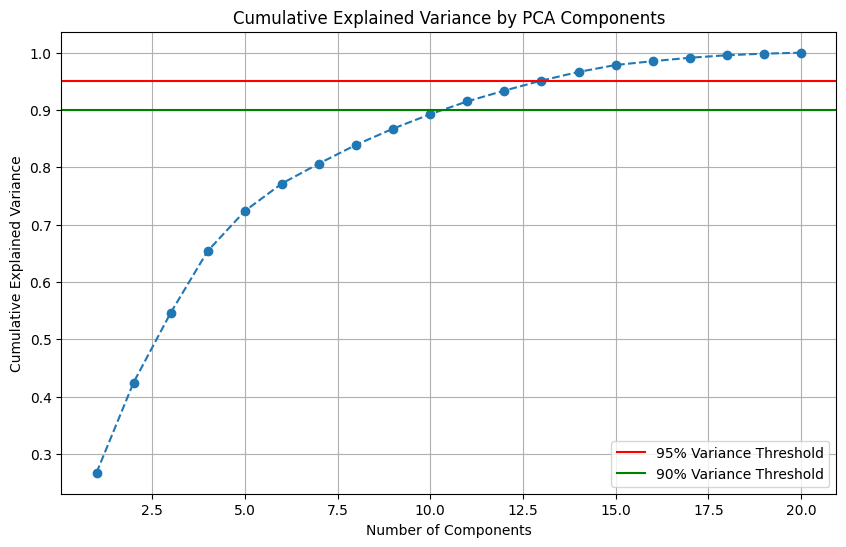


Number of components to retain 95% variance: 13


In [5]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Threshold')
plt.axhline(y=0.90, color='g', linestyle='-', label='90% Variance Threshold')
plt.legend()
plt.show()
# Choose optimal number of components
n_components = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"\nNumber of components to retain 95% variance: {n_components}")

Visualizing the first two principal components

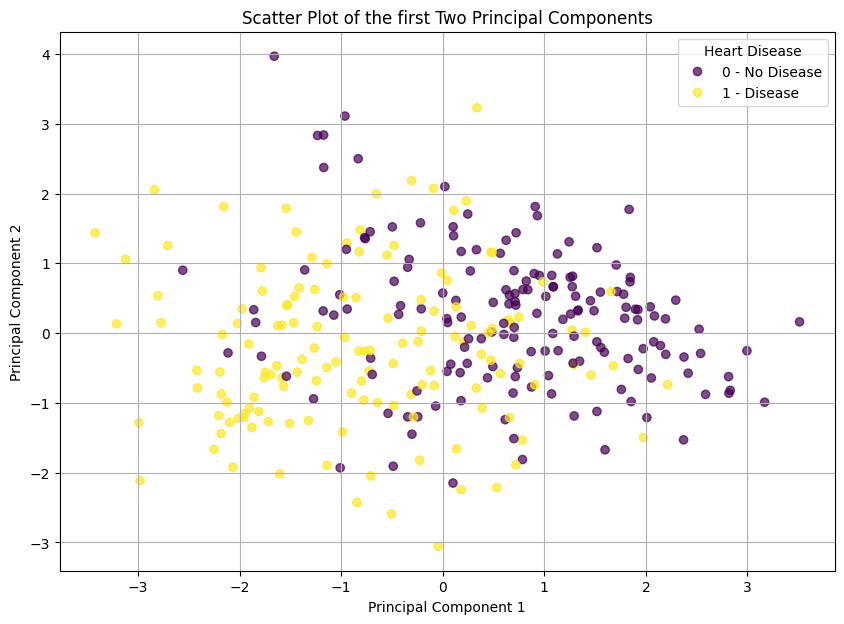

       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0 -1.072490  0.258394  1.037182 -0.119774  0.953289 -0.168047 -0.151114   
1 -2.804616  0.536802  0.003767 -0.617366 -0.979691 -0.090323 -0.259099   
2 -1.957112 -1.208116 -0.428867  0.056204  0.846473  0.874964 -0.066097   
3  1.135660 -0.251109  1.406952  2.691248  1.082938 -0.893851  0.210580   
4  1.591257 -0.273598  0.984122  0.735972  0.129932 -0.368240 -0.827301   

       PC_8      PC_9     PC_10     PC_11     PC_12     PC_13  target  
0  0.520553 -1.032009 -0.042051 -0.232873  0.586556  0.101403       0  
1  0.358687 -0.161476  0.112805 -0.161623  0.408115  0.413059       1  
2  0.304299  0.241857  0.124506 -0.386049  0.130411 -0.373702       1  
3 -0.248456 -0.390239 -0.400314  0.143627  0.169677  0.383118       0  
4  0.489760 -0.393350  0.433480  0.376107 -0.391069 -0.582531       0  

PCA-transformed dataset with 13 components saved to 'C:\MENNA_DATA\Heart_Disease_Project\pca_transformed_dataset.csv

In [8]:
y_binary = y.apply(lambda x: 1 if x > 0 else 0)
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y_binary,
    cmap='viridis',
    alpha=0.7
)
plt.title('Scatter Plot of the first Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
labels = [f"{val} - No Disease" if val == 0 else f"{val} - Disease"
          for val in sorted(y_binary.unique())]
plt.legend(handles=scatter.legend_elements()[0],
           labels=labels,
           title="Heart Disease")
plt.grid(True)
plt.show()
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X)
pca_cols = [f'PC_{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(X_pca_final, columns=pca_cols)
df_pca['target'] = y_binary.values 
print(df_pca.head())
joblib.dump(pca_final, 'C:\\MENNA_DATA\\Heart_Disease_Project\\pca.pkl')
df_pca.to_csv('C:\\MENNA_DATA\\Heart_Disease_Project\\pca_transformed_dataset.csv', index=False)
print(f"\nPCA-transformed dataset with {n_components} components saved to 'C:\\MENNA_DATA\\Heart_Disease_Project\\pca_transformed_dataset.csv'.")
print("\nFinal shape of PCA dataset:", df_pca.shape)

In [9]:
X_pca_final

array([[-1.07248995,  0.25839434,  1.0371816 , ..., -0.23287325,
         0.58655611,  0.1014035 ],
       [-2.80461631,  0.53680191,  0.00376675, ..., -0.16162302,
         0.40811469,  0.41305873],
       [-1.95711204, -1.20811565, -0.42886654, ..., -0.38604898,
         0.13041092, -0.3737021 ],
       ...,
       [-0.84547214, -2.42680206,  0.60305017, ...,  0.59286544,
        -0.14626979, -0.08091238],
       [ 0.98537697,  0.73468462, -0.0882724 , ...,  1.03954728,
        -0.21327179, -0.30765562],
       [ 2.37509054, -0.34204897,  1.44201361, ..., -0.1717384 ,
         0.08896284,  0.33124351]], shape=(303, 13))